<img src="./unal.png" align=left width="150" height="150"></img>

$\;$

---
<h2 align="center">Modelo con Sobredispersion Binomial (Germinación de la semilla de Orobanche)</h2>


### Oscar Julian Layton

Orobanche es un género de plantas parásitas sin clorofila que crecen en las raíces de las plantas con flores. En el curso de la investigación de los factores que afectan la germinación de la semilla de la especie Orobanche aegyptiaca, un lote de semillas se cepilló sobre una placa que contiene una dilución 1/125 de un extracto preparado a partir de las raíces de frijol o pepino. Se registró la cantidad de semillas que germinaron. Los resultados de los experimentos corresponden a dos variedades de Orobanche aegyptiaca, concretamente, O. aegyptiaca 75 y O. aegyptiaca 73.

* **specie:** (aegyptiaca75	, aegyptiaca73)
* **extract:** variedades de Orobanche (Cucumber, Bean) (pepino,frijol)
* **germinated:** Numero de semillas germinadas.
* **seeds:** Número de semillas colocadas

No obstante la variable de respuesta es la proporción GERMINATED/SEEDS

In [8]:
rm(list=ls())
setwd("")  #Asignando capeta busqueda por default
library(sqldf)
library(numDeriv)
library(Rfast)
source("macros.txt")
source("test.txt")

In [9]:
###################### Lectura de los datos ######################
orobanche <- read.table("orobanche.txt",header=TRUE)
str(orobanche)
head(orobanche)

'data.frame':	21 obs. of  4 variables:
 $ specie    : Factor w/ 2 levels "aegyptiaca73",..: 2 2 2 2 2 2 2 2 2 2 ...
 $ extract   : Factor w/ 2 levels "Bean","Cucumber": 1 1 1 1 1 2 2 2 2 2 ...
 $ germinated: int  10 23 23 26 17 5 53 55 32 46 ...
 $ seeds     : int  39 62 81 51 39 6 74 72 51 79 ...


specie,extract,germinated,seeds
aegyptiaca75,Bean,10,39
aegyptiaca75,Bean,23,62
aegyptiaca75,Bean,23,81
aegyptiaca75,Bean,26,51
aegyptiaca75,Bean,17,39
aegyptiaca75,Cucumber,5,6


Considerando que el modelo es binomial, entonces la respuesta es la proporción germinated/seeds, los pesos weights=seeds es el número de semillas

In [10]:
###################### Estimación del modelo ######################
fit11 <- glm(germinated/seeds ~ specie + extract, weights=seeds, family=binomial(link="logit"), data=orobanche)
fit12 <- glm(germinated/seeds ~ specie + extract, weights=seeds, family=binomial(link="probit"), data=orobanche)
fit13 <- glm(germinated/seeds ~ specie + extract, weights=seeds, family=binomial(link="cloglog"), data=orobanche)


In [11]:
###################### Valores del AIC y BIC ######################
AIC(fit11,fit12,fit13)
BIC(fit11,fit12,fit13)

,df,AIC
fit11,3,122.2821
fit12,3,122.2978
fit13,3,121.2496


,df,BIC
fit11,3,125.4157
fit12,3,125.4313
fit13,3,124.3831


Aquí el mejor modelo en terminos de AIC, BIC es Binomial con función de enlace cloglog

In [26]:
###################### Resumen del modelo seleccionado ######################
summary(fit13)
gof_glm(fit13)


Call:
glm(formula = germinated/seeds ~ specie + extract, family = binomial(link = "cloglog"), 
    data = orobanche, weights = seeds)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-2.3206  -0.8813  -0.3608   0.9501   2.4933  

Coefficients:
                   Estimate Std. Error z value Pr(>|z|)    
(Intercept)         -0.9130     0.1150  -7.936 2.08e-15 ***
specieaegyptiaca75   0.2192     0.1100   1.992   0.0464 *  
extractCucumber      0.7707     0.1042   7.398 1.38e-13 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 98.719  on 20  degrees of freedom
Residual deviance: 38.653  on 18  degrees of freedom
AIC: 121.25

Number of Fisher Scoring iterations: 4



  Family:  binomial 
    Link:  cloglog 
                                                    Df    Value
Residual deviance                                   18  38.6533
Pearson's statistic                                 18  37.3293
Adjusted R-squared based on the residual deviance        0.5649
Adjusted R-squared based on the Pearson's statistic      0.5579
-2*log-Likelihood                                      115.2496
AIC                                                    121.2496
BIC                                                    124.3831




Conocemos que en el caso de la Binomial el $\phi$ es conocido y es 1. No obstante para conocer $\phi$ estimamos mediante:

$$\widehat{\phi}= \frac{D(y; \widehat{\mu})}{n-p}$$


In [25]:
38.6533/18

[1] 2.147406

Se puede ver que la estimación de $\phi$ se encuentra muy lejos de 1, se esperaria que fuera muy cercano pero es mas del doble. Esto es un indicio a sobredispersión. Al igual como se especifica en el envelope, residuos positivos con tendencia a ser más positivos saliéndose de las bandas. Así mimso residuos negativos con tendencia a ser más negativos y saliéndose de las bandas.

  |++++++++++++++++++++++++++++++++++++++++++++++++++| 100%


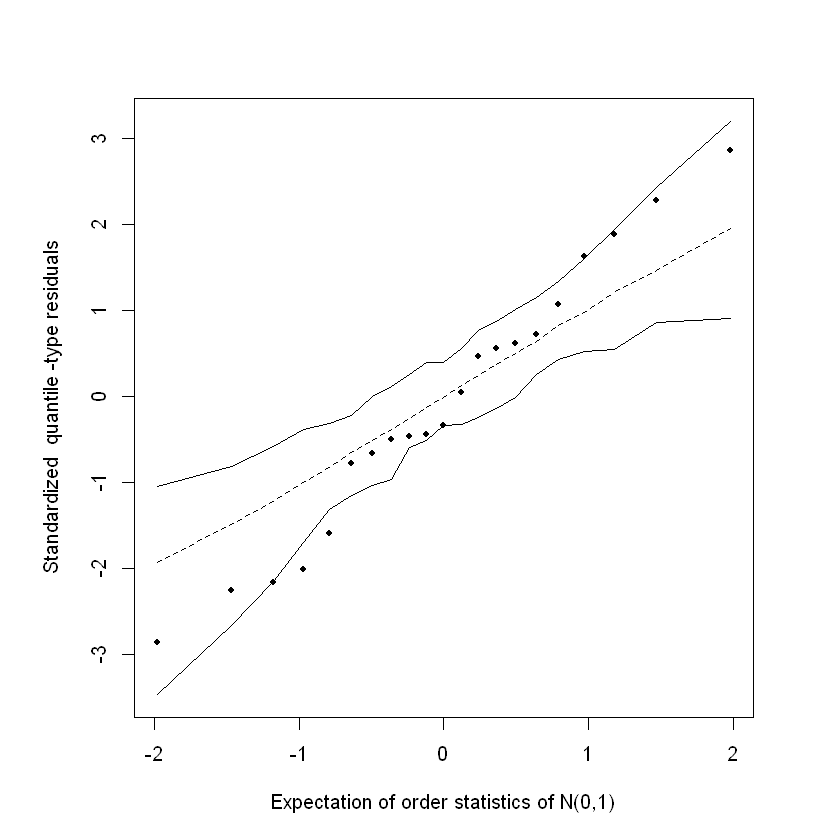

In [27]:
envelope_glm(fit13,rep=100)

## Otra forma de atacar el problema BetaBinomial

En este tipo de modelo los pesos (weigths) no significa lo mismo que los $m_k$ y es necesario colocarlo en términos de éxitos y fracasos 

In [14]:
###################### Estimación del modelo ######################
fit21 <- overglm(cbind(germinated,seeds-germinated) ~ specie + extract, family="bb(logit)",data=orobanche)#cbin paraconcatenar
fit22 <- overglm(cbind(germinated,seeds-germinated) ~ specie + extract, family="bb(probit)", data=orobanche)
fit23 <- overglm(cbind(germinated,seeds-germinated) ~ specie + extract, family="bb(cloglog)", data=orobanche)
AIC(fit21,fit22,fit23)
BIC(fit21,fit22,fit23)



  Family:  Beta-Binomial 
Predictor:  1 + specie + extract 

 Object    Link -2*log-likelihood df     AIC 
  fit21   logit          111.6637  4 119.6637
  fit22  probit          111.6807  4 119.6807
  fit23 cloglog          110.9556  4 118.9556


  Family:  Beta-Binomial 
Predictor:  1 + specie + extract 

 Object    Link -2*log-likelihood df     BIC 
  fit21   logit          111.6637  4 123.8418
  fit22  probit          111.6807  4 123.8588
  fit23 cloglog          110.9556  4 123.1337


En este tipo de modelo, al identificar el AIC, BIC se logra determinar que el mejor modelo es el Beta-Binomial con función enlace cloglog. Por consiguiente se procede a comparar el complemento log-log de la binomial y la Beta-Binomial: 

In [30]:
AIC(fit23,fit13)
BIC(fit23,fit13)


     Link:  cloglog 
Predictor:  1 + specie + extract 

 Object        Family -2*log-likelihood df     AIC 
  fit23 Beta-Binomial          110.9556  4 118.9556
  fit13      Binomial          115.2496  3 121.2496

     Link:  cloglog 
Predictor:  1 + specie + extract 

 Object        Family -2*log-likelihood df     BIC 
  fit23 Beta-Binomial          110.9556  4 123.1337
  fit13      Binomial          115.2496  3 124.3831


Observando lo descrito en lña anterior línea se puede establecer que el mejor modelo en tperminos de AIC, BIC y que mejor describe el problema de la sobredispersión es la Beta-Binomila con función de enlace cloglog.

In [32]:
summary(fit23)


Sample size:  21 
     Family:  Beta-Binomial
       Link:  cloglog
 *************************************************************
                   Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)        -0.93241   0.15328 -6.08322 1.1779e-09
specieaegyptiaca75  0.26967   0.14888  1.81128   0.070097
extractCucumber     0.73943   0.14422  5.12701 2.9437e-07

                   Estimate Std.Error
Dispersion          0.01863   0.01422
 *************************************************************
                 -2*log-likelihood:  110.956 
                               AIC:  118.956 
                               BIC:  123.134 


Comparando con los parámetros del Binomial con respecto al Beta-Binomial, se logra observar que los parámetros no cambian tanto sin embargo son menores. en cuanto a los errores estandar de la Binomial son: (0.1150 - 0.1100  -0.1042) es decir que se estaban subestimando.

---

## Inferencia con respecto al modelo 

In [16]:
###################### Test de Wald ######################
fit211 <- overglm(cbind(germinated,seeds-germinated) ~ extract, family="bb(cloglog)", data=orobanche)
anova_glm(fit211,fit21,test="wald")


  Wald test 

 Model 1:  cbind(germinated, seeds - germinated) ~ specie + extract 
 Model 2:  cbind(germinated, seeds - germinated) ~ extract 

   Chi    Df   Pr(>Chi)
  2.6439   1     0.1039


In [17]:
###################### Test de score ######################
anova_glm(fit211,fit21,test="score")


  Rao's score test 

 Model 1:  cbind(germinated, seeds - germinated) ~ specie + extract 
 Model 2:  cbind(germinated, seeds - germinated) ~ extract 

   Chi    Df   Pr(>Chi)    
  34.463   1  4.344e-09 ***


In [18]:
###################### Test de razón de verosimilitudes ######################
anova_glm(fit211,fit21,test="lrt")



  Likelihood-ratio test 

 Model 1:  cbind(germinated, seeds - germinated) ~ specie + extract 
 Model 2:  cbind(germinated, seeds - germinated) ~ extract 

   Chi    Df   Pr(>Chi)  
  2.7283   1    0.09858 .


In [19]:
###################### Test gradiente ######################
anova_glm(fit211,fit21,test="gradient")


  Gradient test 

 Model 1:  cbind(germinated, seeds - germinated) ~ specie + extract 
 Model 2:  cbind(germinated, seeds - germinated) ~ extract 

   Chi    Df   Pr(>Chi)   
  10.697   1   0.001073 **


In [20]:
summary(fit211)


Sample size:  21 
     Family:  Beta-Binomial
       Link:  cloglog
 *************************************************************
                Estimate Std.Error  z-value   Pr(>|z|)
(Intercept)     -0.75158   0.11630 -6.46247 1.0300e-10
extractCucumber  0.71909   0.14868  4.83654 1.3212e-06

                Estimate Std.Error
Dispersion       0.02178   0.01606
 *************************************************************
                 -2*log-likelihood:  114.392 
                               AIC:  120.392 
                               BIC:  123.526 


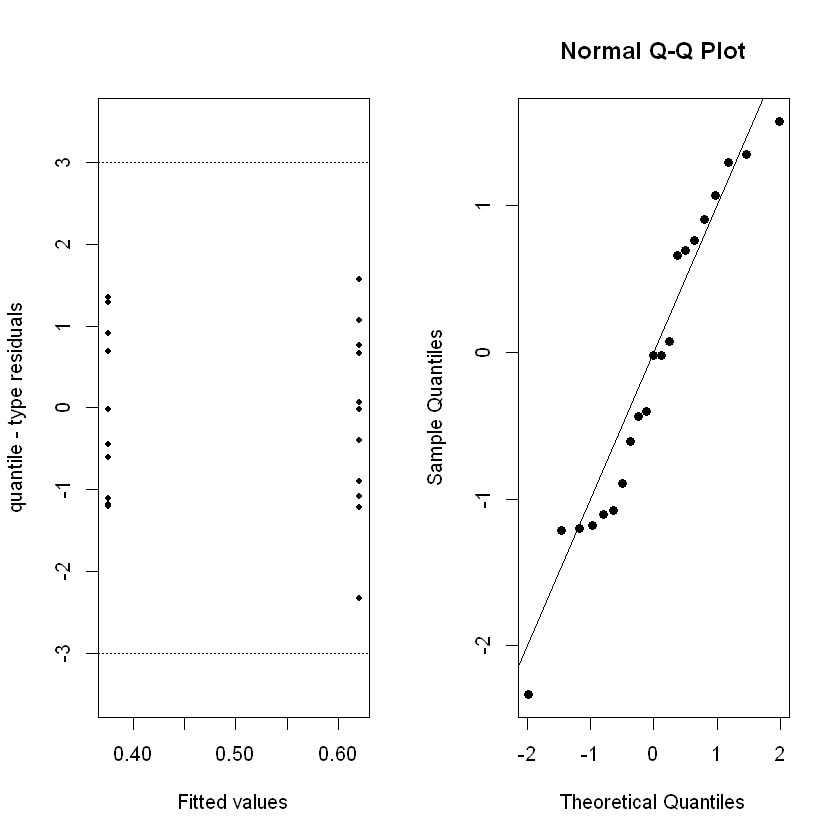

In [21]:
################################# Diagnóstico del modelo seleccionado #################################
###################### Análisis de residuos ######################
par(mfrow=c(1,2))
res <- residuals(fit211,plot=TRUE,type="quantile",identify=1)
qqnorm(res,pch=16)
abline(0,1)


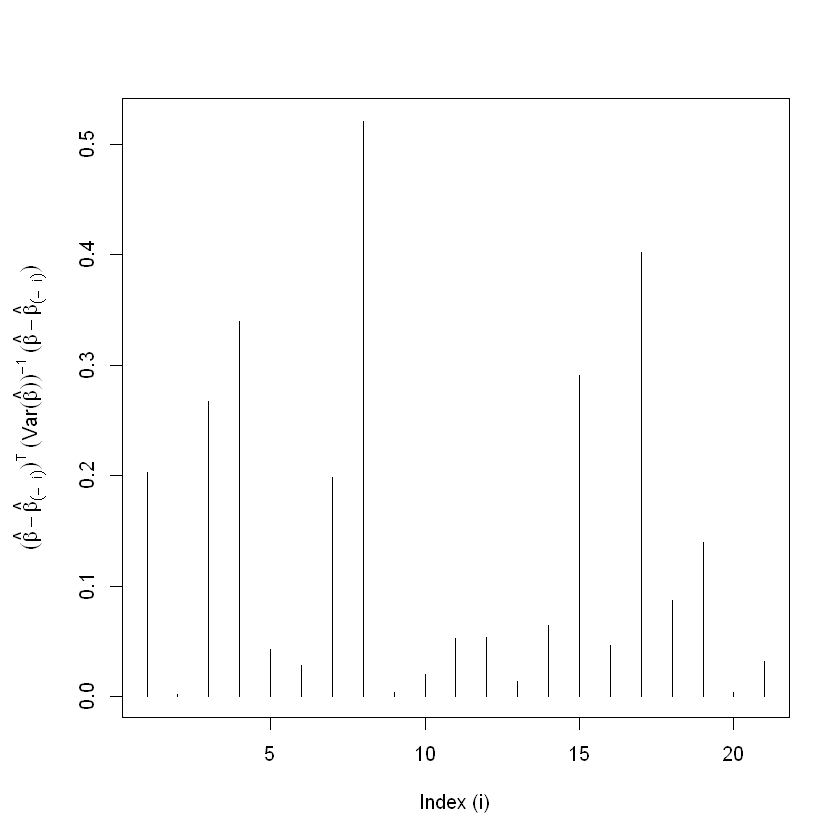

In [22]:
###################### Análisis de sensibilidad ######################
CookDistance(fit211,plot=TRUE,out=FALSE,identify=2)

In [23]:
###################### Intervalos de confianza ######################
ci_glm(fit211)	


 Approximate 95 percent confidence intervals based on the Wald test 

                Lower limit Upper limit
(Intercept)      -0.9795193     -0.5236
extractCucumber   0.4276824      1.0105
Dispersion        0.0051347      0.0924
